In [4350]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4351]:
bikes= pd.read_csv("day.csv")

In [4352]:
bikes

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        6           0   
1          2  02-01-2018       1   0     1        0        0           0   
2          3  03-01-2018       1   0     1        0        1           1   
3          4  04-01-2018       1   0     1        0        2           1   
4          5  05-01-2018       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windspeed  casual  registered  \
0             2  14.110847  18.18125  80.5833  10.749882     331         654   
1             2  14.902598  17.68695  69.6087  16.652113     131         670   
2             1   8.050924   9.47025  43.7273  16.636703     120        1229   
3             1   8.200000  10.60610  59.0435  10.739832     108        1454   
4             1   9.305237  11.46350  43.6957  12.522300      82        1518   
..          ...        ...       ...      ...        ...     ...         ...   
725           2  10.420847  11.33210  65.2917  23.458911     247        1867   
726           2  10.386653  12.75230  59.0000  10.416557     644        2451   
727           2  10.386653  12.12000  75.2917   8.333661     159        1182   
728           1  10.489153  11.58500  48.3333  23.500518     364        1432   
729           2   8.849153  11.17435  57.7500  10.374682     439        2290   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
725  2114  
726  3095  
727  1341  
728  1796  
729  2729  

[730 rows x 16 columns]

# Studying and Understanding Data 

In [4353]:
bikes['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [4354]:
bikes.shape

(730, 16)

In [4355]:
bikes.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [4356]:
bikes['mnth'].value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [4357]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


The information shows there are no null values in each columns

In [4358]:
# group by year to find if that varies year
bikes.groupby(['yr']).casual.value_counts()

yr  casual
0   120       3
    639       3
    38        2
    47        2
    54        2
             ..
1   3155      1
    3160      1
    3252      1
    3283      1
    3410      1
Name: casual, Length: 659, dtype: int64

In [4359]:
bikes.groupby(['yr']).registered.value_counts()

yr  registered
0   674           2
    1368          2
    1454          2
    1506          2
    1518          2
                 ..
1   6844          1
    6898          1
    6911          1
    6917          1
    6946          1
Name: registered, Length: 693, dtype: int64

In [4360]:
bikes.groupby(['season']).registered.value_counts()

season  registered
1       1454          2
        1518          2
        1707          2
        1730          2
        416           1
                     ..
4       6736          1
        6844          1
        6898          1
        6911          1
        6946          1
Name: registered, Length: 714, dtype: int64

In [4361]:
bikes.groupby(['season']).casual.value_counts()

season  casual
1       120       3
        140       3
        163       3
        244       3
        9         2
                 ..
4       2454      1
        2589      1
        2643      1
        2806      1
        3031      1
Name: casual, Length: 672, dtype: int64

## ploting to find out the relationships between each of the values in data set

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 720x576 with 0 Axes>

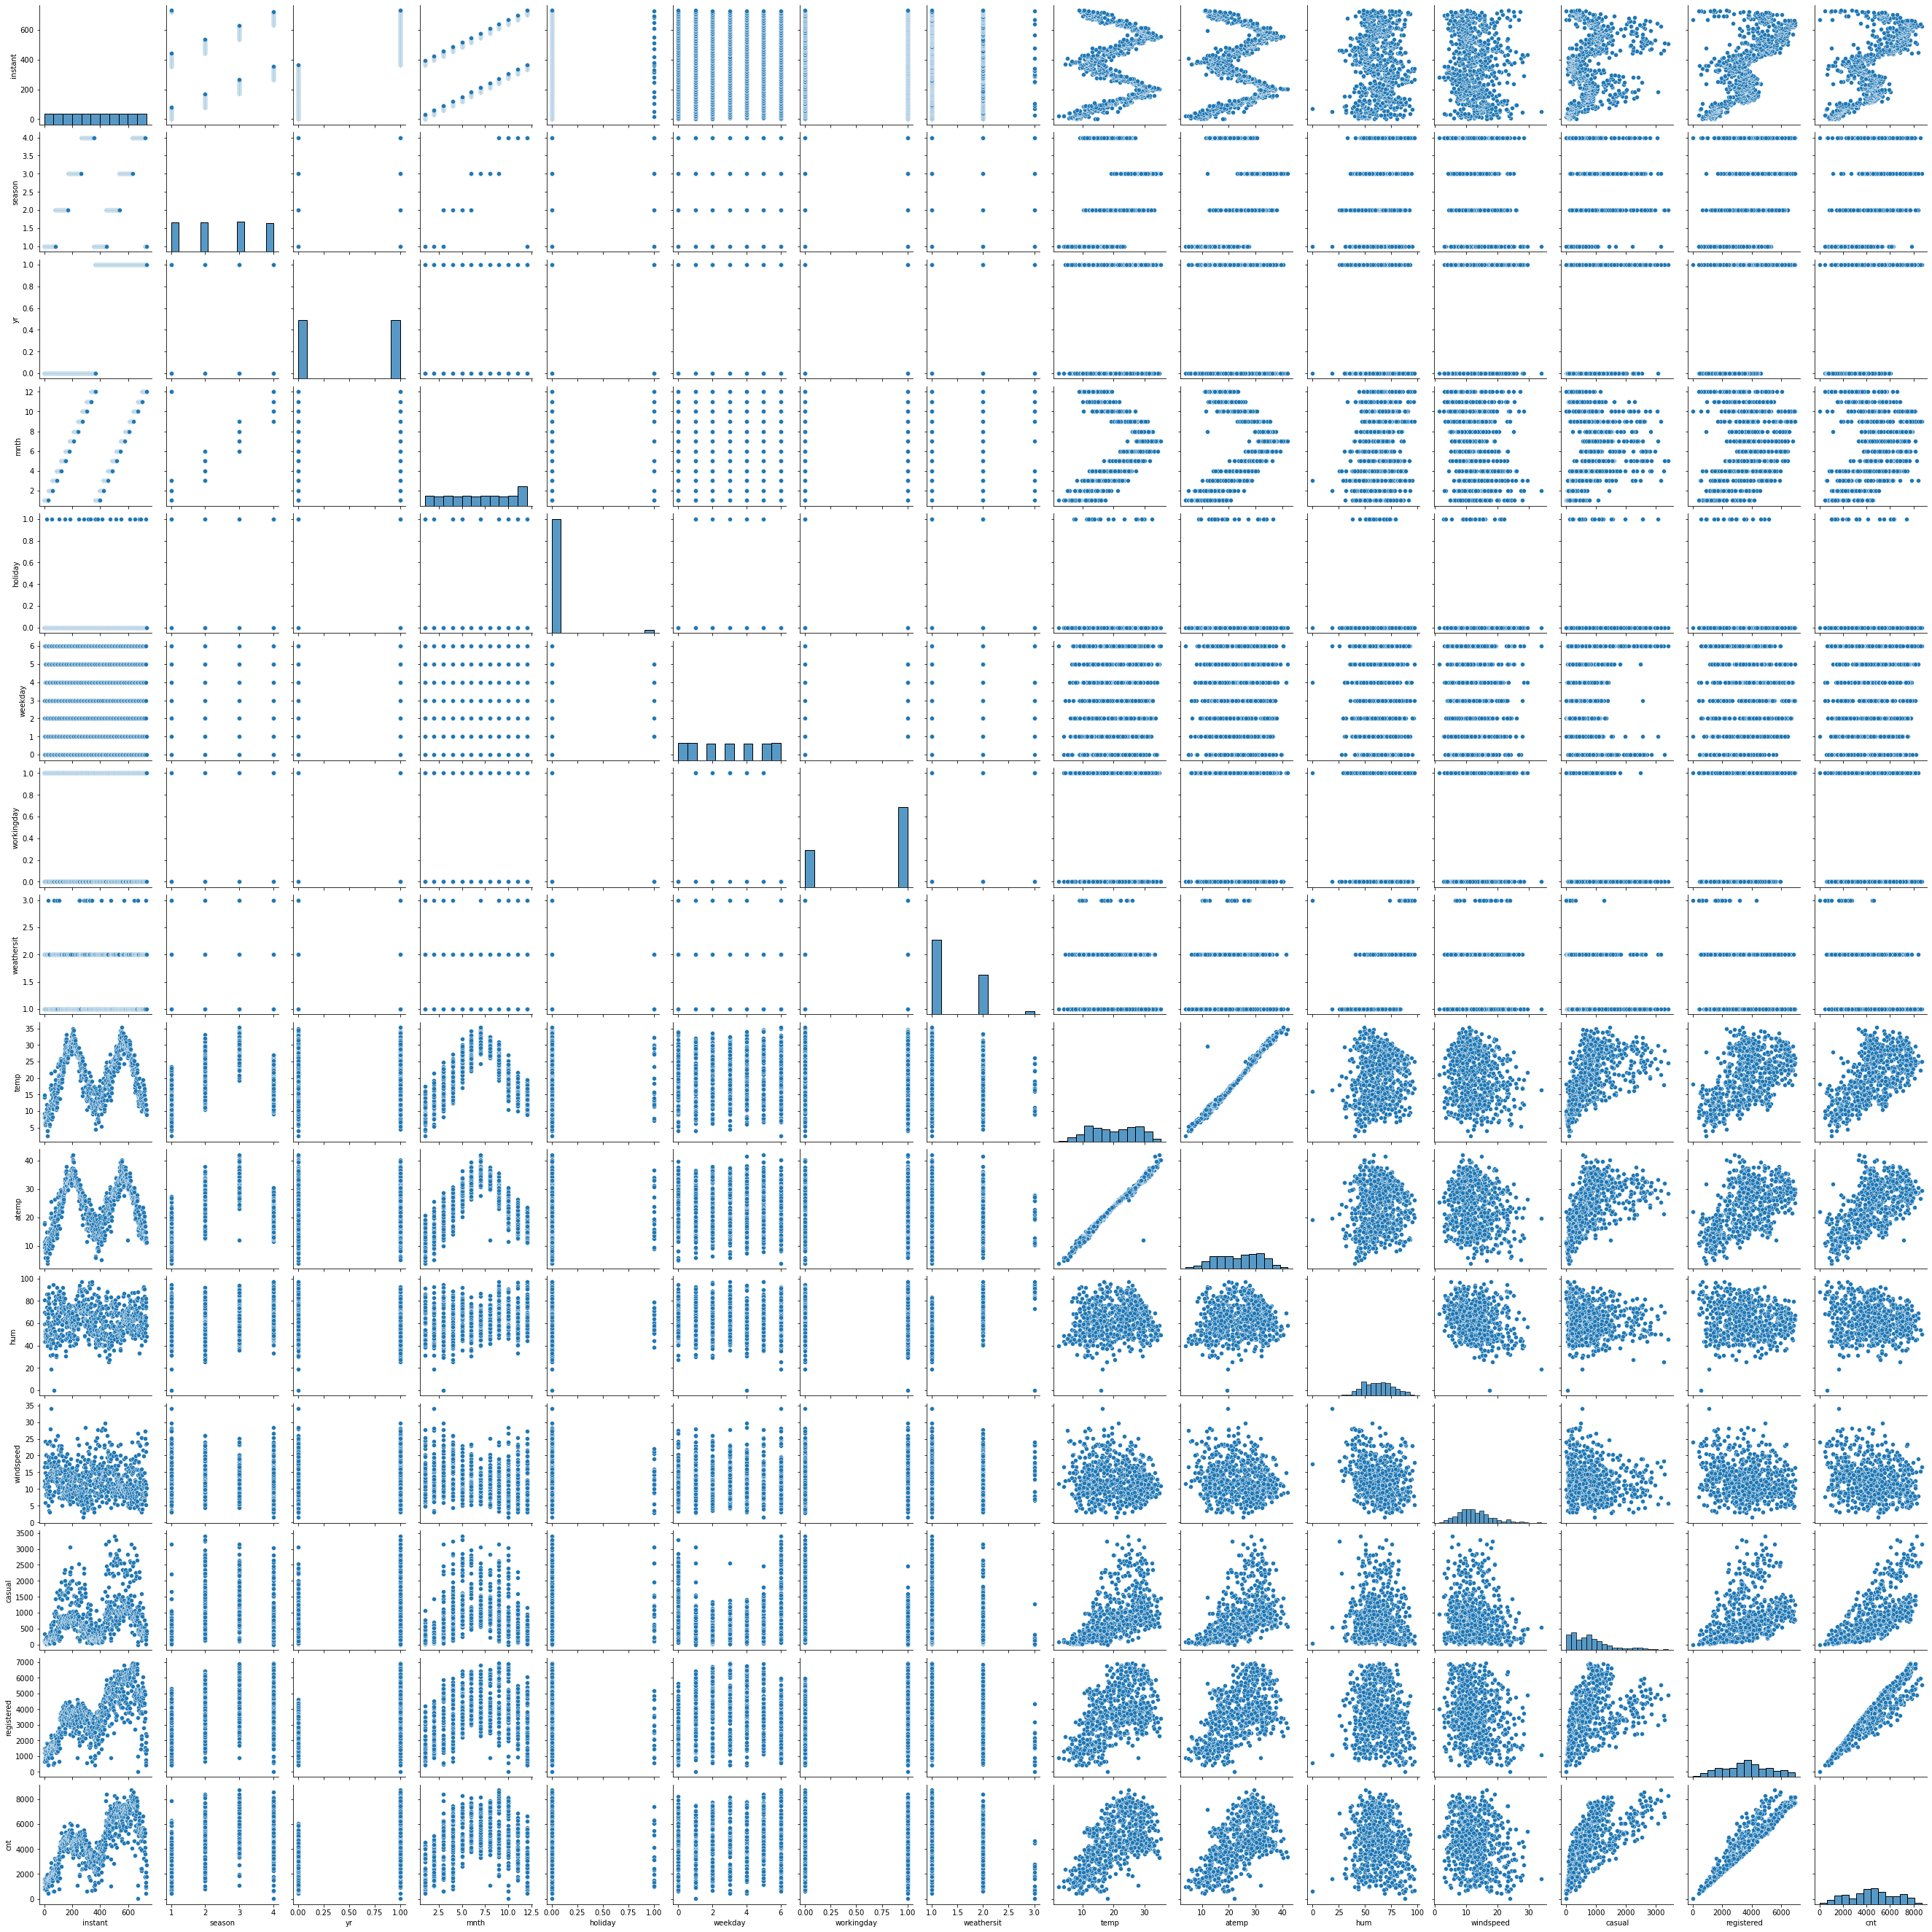

In [4362]:
plt.figure(figsize=(10,8))
sns.pairplot(bikes)
plt.show

In [4363]:
# selecting numerical variables only

Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	

In [4364]:
bikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### classification of numerical data to plot pairplot analyse the relationships each pair of columns

In [4365]:
num_vars=['instant', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt']

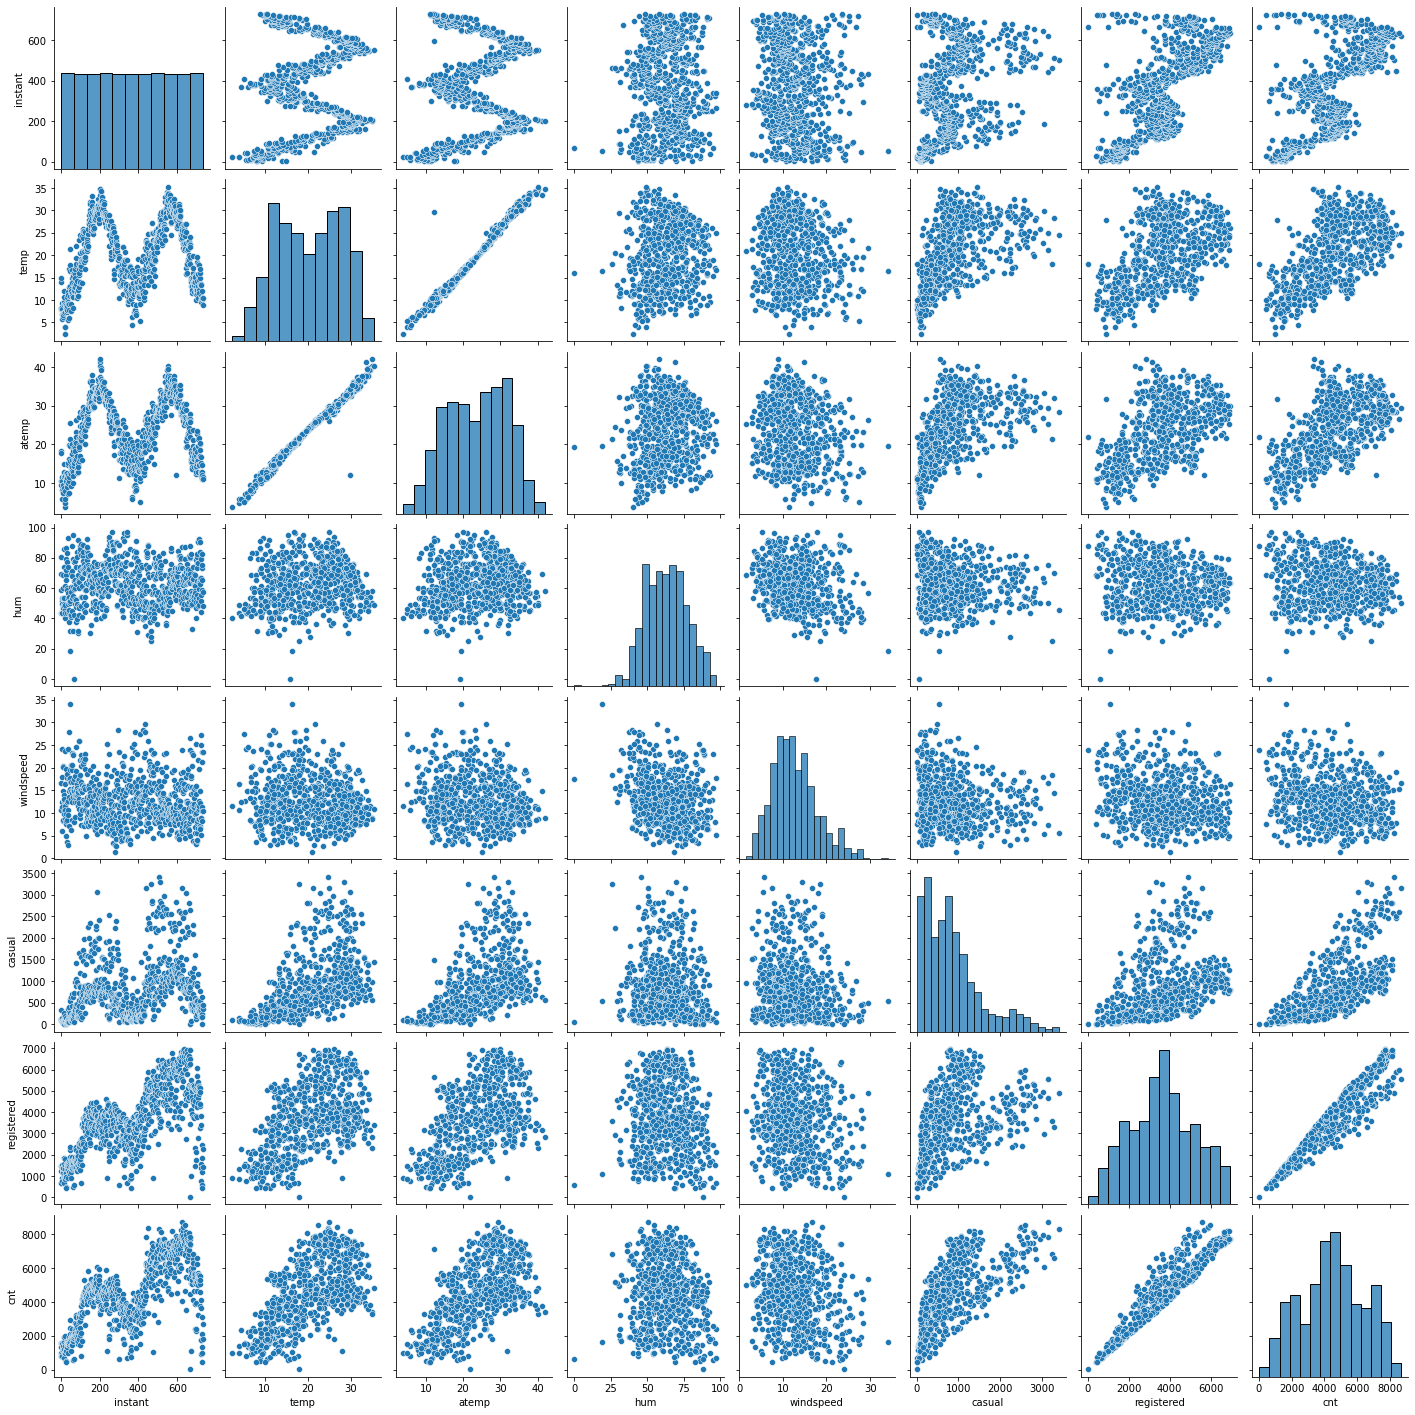

In [4366]:
sns.pairplot(bikes[num_vars])

- The temperature shows a linear relationship with the Total count, casual and registered
- Also the Temp and atemp almost behave in the same manner
- Temperatue must be highly correlated with the total count

### lets rename all the variable which has more been confused 

In [4367]:
bikes=bikes.rename(columns={'dteday':'date', 'yr':'year', 'mnth':'month', 'weathersit':'weather', 'atemp':'atm_temp', 'hum':'humidy', 'cnt':'total_users'})

In [4368]:
bikes

instant        date  season  year  month  holiday  weekday  workingday  \
0          1  01-01-2018       1     0      1        0        6           0   
1          2  02-01-2018       1     0      1        0        0           0   
2          3  03-01-2018       1     0      1        0        1           1   
3          4  04-01-2018       1     0      1        0        2           1   
4          5  05-01-2018       1     0      1        0        3           1   
..       ...         ...     ...   ...    ...      ...      ...         ...   
725      726  27-12-2019       1     1     12        0        4           1   
726      727  28-12-2019       1     1     12        0        5           1   
727      728  29-12-2019       1     1     12        0        6           0   
728      729  30-12-2019       1     1     12        0        0           0   
729      730  31-12-2019       1     1     12        0        1           1   

     weather       temp  atm_temp   humidy  windspeed  casual  registered  \
0          2  14.110847  18.18125  80.5833  10.749882     331         654   
1          2  14.902598  17.68695  69.6087  16.652113     131         670   
2          1   8.050924   9.47025  43.7273  16.636703     120        1229   
3          1   8.200000  10.60610  59.0435  10.739832     108        1454   
4          1   9.305237  11.46350  43.6957  12.522300      82        1518   
..       ...        ...       ...      ...        ...     ...         ...   
725        2  10.420847  11.33210  65.2917  23.458911     247        1867   
726        2  10.386653  12.75230  59.0000  10.416557     644        2451   
727        2  10.386653  12.12000  75.2917   8.333661     159        1182   
728        1  10.489153  11.58500  48.3333  23.500518     364        1432   
729        2   8.849153  11.17435  57.7500  10.374682     439        2290   

     total_users  
0            985  
1            801  
2           1349  
3           1562  
4           1600  
..           ...  
725         2114  
726         3095  
727         1341  
728         1796  
729         2729  

[730 rows x 16 columns]

In [4369]:
bikes.columns

Index(['instant', 'date', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather', 'temp', 'atm_temp', 'humidy', 'windspeed',
       'casual', 'registered', 'total_users'],
      dtype='object')

# categorical variables

### - Dealing with catergorical variables
### - some values are represented in numerical form which we needs to convert to string values.


In [4370]:
bikes['season']=bikes['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [4371]:
bikes['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [4372]:
bikes.groupby(['season']).total_users.value_counts()

season  total_users
fall    1115           1
        1842           1
        1996           1
        2710           1
        3285           1
                      ..
winter  7907           1
        7965           1
        8090           1
        8156           1
        8555           1
Name: total_users, Length: 724, dtype: int64

## Drop columns 

### As we say that we the variables like date and instant doesnt say much about the target data we can drop these columns

In [4373]:
bikes=bikes.drop('instant', axis=1)

In [4374]:
bikes=bikes.drop('date', axis=1)

In [4375]:
bikes

season  year  month  holiday  weekday  workingday  weather       temp  \
0    spring     0      1        0        6           0        2  14.110847   
1    spring     0      1        0        0           0        2  14.902598   
2    spring     0      1        0        1           1        1   8.050924   
3    spring     0      1        0        2           1        1   8.200000   
4    spring     0      1        0        3           1        1   9.305237   
..      ...   ...    ...      ...      ...         ...      ...        ...   
725  spring     1     12        0        4           1        2  10.420847   
726  spring     1     12        0        5           1        2  10.386653   
727  spring     1     12        0        6           0        2  10.386653   
728  spring     1     12        0        0           0        1  10.489153   
729  spring     1     12        0        1           1        2   8.849153   

     atm_temp   humidy  windspeed  casual  registered  total_users  
0    18.18125  80.5833  10.749882     331         654          985  
1    17.68695  69.6087  16.652113     131         670          801  
2     9.47025  43.7273  16.636703     120        1229         1349  
3    10.60610  59.0435  10.739832     108        1454         1562  
4    11.46350  43.6957  12.522300      82        1518         1600  
..        ...      ...        ...     ...         ...          ...  
725  11.33210  65.2917  23.458911     247        1867         2114  
726  12.75230  59.0000  10.416557     644        2451         3095  
727  12.12000  75.2917   8.333661     159        1182         1341  
728  11.58500  48.3333  23.500518     364        1432         1796  
729  11.17435  57.7500  10.374682     439        2290         2729  

[730 rows x 14 columns]

In [4376]:
# change year
bikes['year']= bikes['year'].map({0:'year2018',1:'year2019'})

In [4377]:
# change weekdays to short form
bikes['weekday']=bikes['weekday'].map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [4378]:
# change Month
bikes['month']=bikes['month'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [4379]:
# convert weather
bikes['weather']= bikes['weather'].map({1: 'Clear',2:'Mist&Cloudy',3:'Light Snow&Rain',4:'Snow&Fog'})

In [4380]:
bikes

season      year month  holiday weekday  workingday      weather  \
0    spring  year2018   Jan        0     Sat           0  Mist&Cloudy   
1    spring  year2018   Jan        0     Sun           0  Mist&Cloudy   
2    spring  year2018   Jan        0     Mon           1        Clear   
3    spring  year2018   Jan        0     Tue           1        Clear   
4    spring  year2018   Jan        0     Wed           1        Clear   
..      ...       ...   ...      ...     ...         ...          ...   
725  spring  year2019   Dec        0     Thu           1  Mist&Cloudy   
726  spring  year2019   Dec        0     Fri           1  Mist&Cloudy   
727  spring  year2019   Dec        0     Sat           0  Mist&Cloudy   
728  spring  year2019   Dec        0     Sun           0        Clear   
729  spring  year2019   Dec        0     Mon           1  Mist&Cloudy   

          temp  atm_temp   humidy  windspeed  casual  registered  total_users  
0    14.110847  18.18125  80.5833  10.749882     331         654          985  
1    14.902598  17.68695  69.6087  16.652113     131         670          801  
2     8.050924   9.47025  43.7273  16.636703     120        1229         1349  
3     8.200000  10.60610  59.0435  10.739832     108        1454         1562  
4     9.305237  11.46350  43.6957  12.522300      82        1518         1600  
..         ...       ...      ...        ...     ...         ...          ...  
725  10.420847  11.33210  65.2917  23.458911     247        1867         2114  
726  10.386653  12.75230  59.0000  10.416557     644        2451         3095  
727  10.386653  12.12000  75.2917   8.333661     159        1182         1341  
728  10.489153  11.58500  48.3333  23.500518     364        1432         1796  
729   8.849153  11.17435  57.7500  10.374682     439        2290         2729  

[730 rows x 14 columns]

# Visualising Categorical data

## Categorical variables can be visualised using boxplots

<AxesSubplot:title={'center':'working vs total_users'}, xlabel='workingday', ylabel='total_users'>

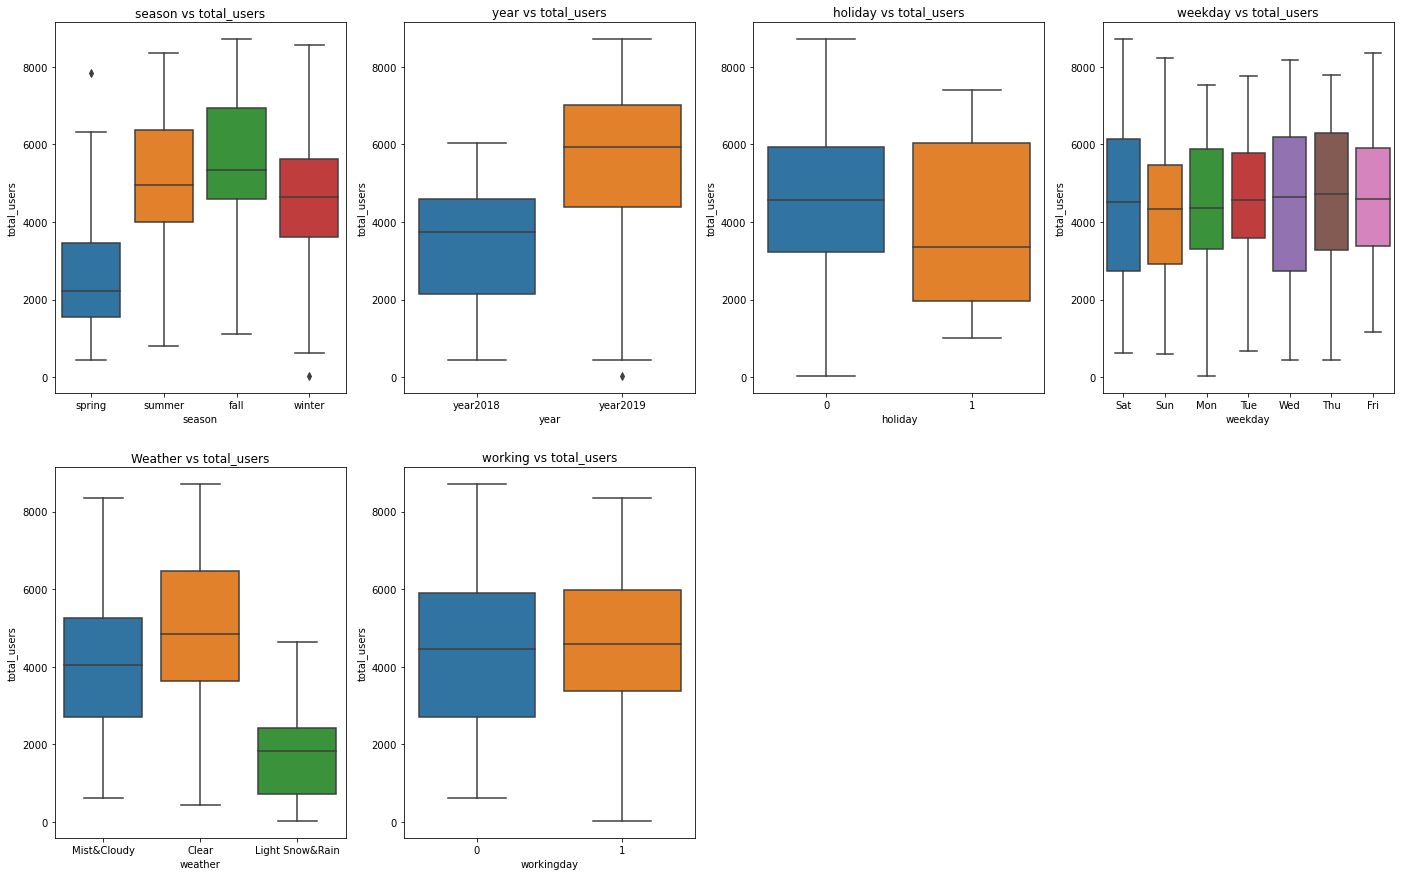

In [4381]:
plt.figure(figsize=(24,15))

plt.subplot(2,4,1)
plt.title('season vs total_users')
sns.boxplot(x='season',y='total_users',data=bikes)

plt.subplot(2,4,2)
plt.title('year vs total_users')
sns.boxplot(x='year',y='total_users',data=bikes)

plt.subplot(2,4,3)
plt.title('holiday vs total_users')
sns.boxplot(x='holiday',y='total_users',data=bikes)

plt.subplot(2,4,4)
plt.title('weekday vs total_users')
sns.boxplot(x='weekday',y='total_users',data=bikes)

plt.subplot(2,4,5)
plt.title('Weather vs total_users')
sns.boxplot(x='weather',y='total_users',data=bikes)

plt.subplot(2,4,6)
plt.title('working vs total_users')
sns.boxplot(x='workingday',y='total_users',data=bikes)



Analysis
- Season Vs Users
Fall has more number of users followed by summer and winter, spring shows the least number of users
- Year vs users;
2019 has more number of users than 2018, this shows the growth 
- holiday vs users;
The deviation between least and the most number of users is more on a holiday
- Weekdays vs users:
The saturday, wednesday and Thursday seems to have most number of users
- Weather vs Total users
On clear weather day we have most number of users
- Workidn day vs users:
On a holiday the deviation between highest and least numbers is high

In [4382]:
bikes.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather', 'temp', 'atm_temp', 'humidy', 'windspeed', 'casual',
       'registered', 'total_users'],
      dtype='object')

# Correlation matrix

### before getting the correlation matrix we can drop two more columns , casual and registered users
### As we are interested in the total numnber users, casual or registered doesnt make much difference.
### we drop these two columns to make our model more simple

In [4383]:
bikes= bikes.drop(['casual','registered'],axis=1)

In [4384]:
bikes

season      year month  holiday weekday  workingday      weather  \
0    spring  year2018   Jan        0     Sat           0  Mist&Cloudy   
1    spring  year2018   Jan        0     Sun           0  Mist&Cloudy   
2    spring  year2018   Jan        0     Mon           1        Clear   
3    spring  year2018   Jan        0     Tue           1        Clear   
4    spring  year2018   Jan        0     Wed           1        Clear   
..      ...       ...   ...      ...     ...         ...          ...   
725  spring  year2019   Dec        0     Thu           1  Mist&Cloudy   
726  spring  year2019   Dec        0     Fri           1  Mist&Cloudy   
727  spring  year2019   Dec        0     Sat           0  Mist&Cloudy   
728  spring  year2019   Dec        0     Sun           0        Clear   
729  spring  year2019   Dec        0     Mon           1  Mist&Cloudy   

          temp  atm_temp   humidy  windspeed  total_users  
0    14.110847  18.18125  80.5833  10.749882          985  
1    14.902598  17.68695  69.6087  16.652113          801  
2     8.050924   9.47025  43.7273  16.636703         1349  
3     8.200000  10.60610  59.0435  10.739832         1562  
4     9.305237  11.46350  43.6957  12.522300         1600  
..         ...       ...      ...        ...          ...  
725  10.420847  11.33210  65.2917  23.458911         2114  
726  10.386653  12.75230  59.0000  10.416557         3095  
727  10.386653  12.12000  75.2917   8.333661         1341  
728  10.489153  11.58500  48.3333  23.500518         1796  
729   8.849153  11.17435  57.7500  10.374682         2729  

[730 rows x 12 columns]

<AxesSubplot:>

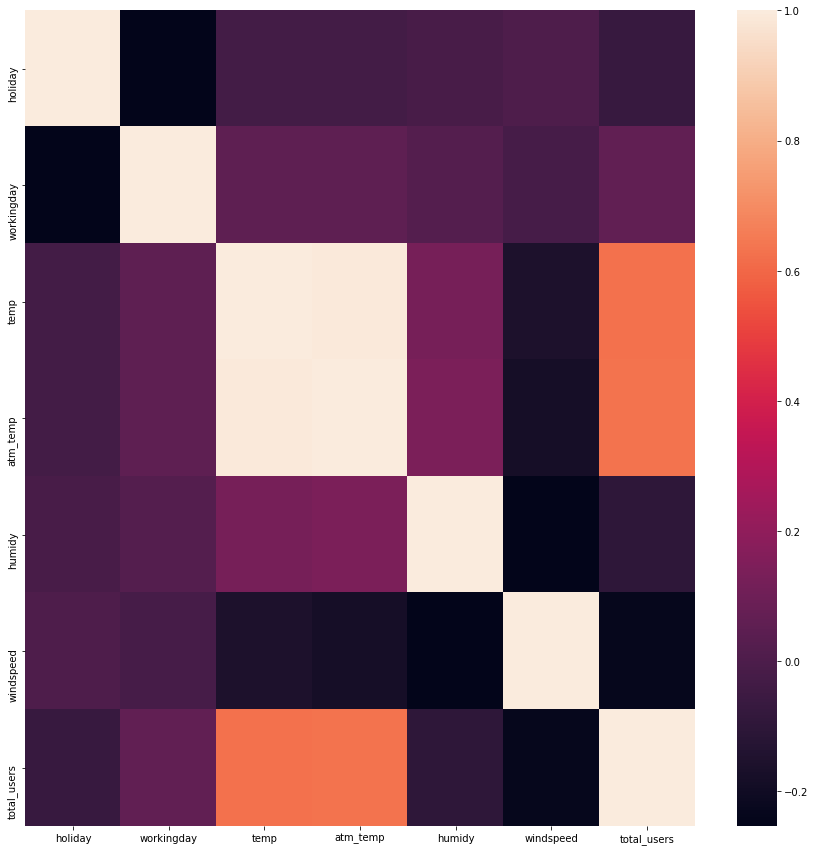

In [4385]:
plt.figure(figsize=(15,15))
sns.heatmap(bikes.corr())

## what we understand from the heatmap is the correlation between the temperature and atm_temp is quite high

In [4386]:
# lets find the correlation between two
bikes['temp'].corr(bikes['atm_temp'])

0.9916961786905648

In [4387]:
# the correlation of 0.99 is very high so we remove atm_temp from the data frame
# we only keep the temp 

bikes= bikes.drop('atm_temp',axis=1)

# Univariate Analysis

In [4388]:
# Using barchart

In [4389]:
bikes.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather', 'temp', 'humidy', 'windspeed', 'total_users'],
      dtype='object')

### Season

<AxesSubplot:xlabel='season', ylabel='total_users'>

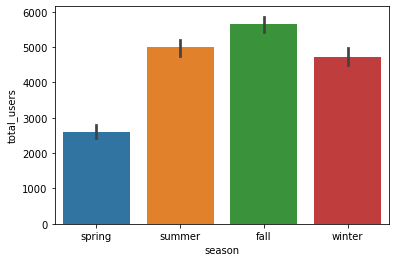

In [4390]:
# season vs total_users
sns.barplot(x='season', y='total_users',data=bikes)

- in Fall we have maximum number of users followed by the summer

<AxesSubplot:xlabel='weather', ylabel='total_users'>

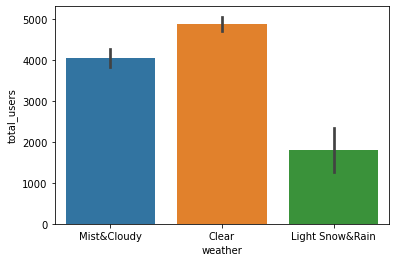

In [4391]:
# Weather vs total_users
sns.barplot(x='weather', y='total_users',data=bikes)

### The number of users where more on a clear weather day followed by mist and cloudy day

<AxesSubplot:xlabel='season', ylabel='total_users'>

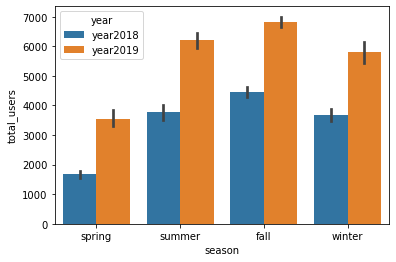

In [4392]:
# season vs total_users
sns.barplot(x='season', y='total_users',hue='year',data=bikes)

- in Fall we have maximum number of users followed by the summer, The trend is same for both the years, and 2019 shows increase in the number of users

<AxesSubplot:xlabel='month', ylabel='total_users'>

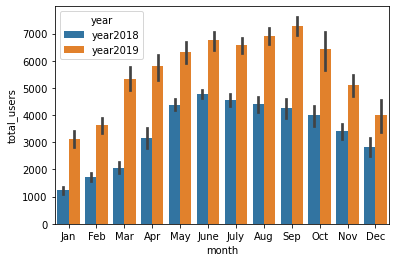

In [4393]:
# about month
sns.barplot(x='month', y='total_users',hue='year',data=bikes)

-  The height number of bike users are there in september and then august 

<AxesSubplot:xlabel='workingday', ylabel='total_users'>

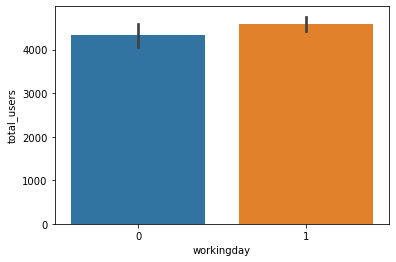

In [4394]:
# Workingday vs holiday count
sns.barplot(x='workingday', y='total_users',data=bikes)

- We have more bikes rented on working days, but working days numbers will be more compared to holidays
- so we need to find which weekday has highest number of bike counts

<AxesSubplot:xlabel='weekday', ylabel='total_users'>

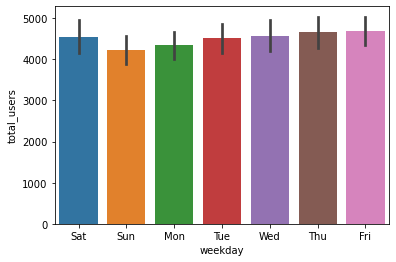

In [4395]:
# about weekday
sns.barplot(x='weekday', y='total_users',data=bikes)

- Thursday, and Wednesday has highest number of users

<AxesSubplot:xlabel='weekday', ylabel='total_users'>

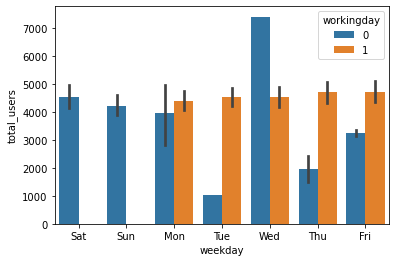

In [4396]:
sns.barplot(x='weekday', y='total_users',hue='workingday',data=bikes)

<AxesSubplot:xlabel='weekday', ylabel='total_users'>

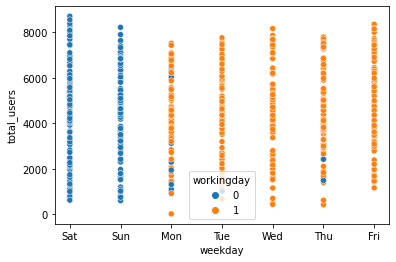

In [4397]:
sns.scatterplot(x='weekday', y='total_users',hue='workingday',data=bikes)

<AxesSubplot:xlabel='weekday', ylabel='total_users'>

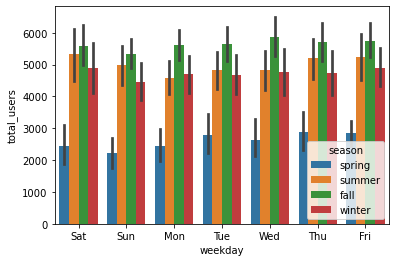

In [4398]:
sns.barplot(x='weekday', y='total_users',hue='season',data=bikes)

- the working days in fall has higher number of users using the app for bikes. 
- In working days of fall and followed by summer have higher number of users using bikes for transit

In [4399]:
bikes.groupby('season').total_users.value_counts()

season  total_users
fall    1115           1
        1842           1
        1996           1
        2710           1
        3285           1
                      ..
winter  7907           1
        7965           1
        8090           1
        8156           1
        8555           1
Name: total_users, Length: 724, dtype: int64

<AxesSubplot:xlabel='month', ylabel='total_users'>

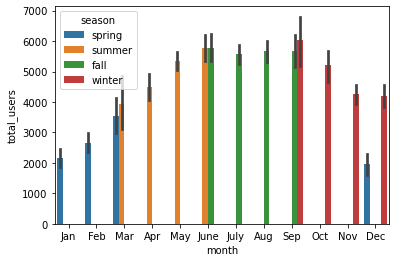

In [4400]:
sns.barplot(x='month', y='total_users',hue='season',data=bikes)

### The above map shows the correlation between seasons and months which will be useful for us during VIF process 

<AxesSubplot:xlabel='temp', ylabel='total_users'>

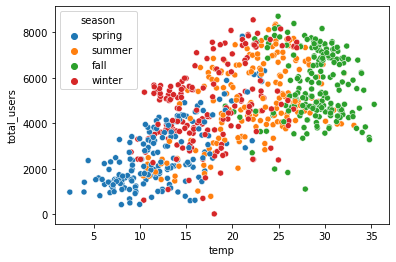

In [4401]:
sns.scatterplot(x='temp', y='total_users', hue= 'season', data=bikes)

- The Fall falls in higher temperature region around 30- 35, this too shows a the importance of temperature felt

# Linear Regression

## 1. Data Preperation 

-drop_first — This is the most important parameter. This takes a boolean value, True or False. If False (default), this will perform one-hot encoding. If True, this will drop the first category of each categorical variable, create k-1 dummy variables for each categorical variable and perform dummy encoding.

In [4402]:
bikes.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather', 'temp', 'humidy', 'windspeed', 'total_users'],
      dtype='object')

## Preparing categorical data for linear regression 

### preparing dummies 

In [4403]:
season= pd.get_dummies(bikes['season'],drop_first=True)

In [4404]:
season

spring  summer  winter
0         1       0       0
1         1       0       0
2         1       0       0
3         1       0       0
4         1       0       0
..      ...     ...     ...
725       1       0       0
726       1       0       0
727       1       0       0
728       1       0       0
729       1       0       0

[730 rows x 3 columns]

In [4405]:
month=pd.get_dummies(bikes['month'],drop_first=True)

In [4406]:
weekday=pd.get_dummies(bikes['weekday'],drop_first=True)

In [4407]:
weather= pd.get_dummies(bikes.weather, drop_first=True)

In [4408]:
years= pd.get_dummies(bikes.year,drop_first=True)

In [4409]:
bikes= pd.concat([bikes, season, month,weekday, weather,years],axis=1)

In [4410]:
bikes.head()

season      year month  holiday weekday  workingday      weather  \
0  spring  year2018   Jan        0     Sat           0  Mist&Cloudy   
1  spring  year2018   Jan        0     Sun           0  Mist&Cloudy   
2  spring  year2018   Jan        0     Mon           1        Clear   
3  spring  year2018   Jan        0     Tue           1        Clear   
4  spring  year2018   Jan        0     Wed           1        Clear   

        temp   humidy  windspeed  ...  Sep  Mon  Sat  Sun  Thu  Tue  Wed  \
0  14.110847  80.5833  10.749882  ...    0    0    1    0    0    0    0   
1  14.902598  69.6087  16.652113  ...    0    0    0    1    0    0    0   
2   8.050924  43.7273  16.636703  ...    0    1    0    0    0    0    0   
3   8.200000  59.0435  10.739832  ...    0    0    0    0    0    1    0   
4   9.305237  43.6957  12.522300  ...    0    0    0    0    0    0    1   

   Light Snow&Rain  Mist&Cloudy  year2019  
0                0            1         0  
1                0            1         0  
2                0            0         0  
3                0            0         0  
4                0            0         0  

[5 rows x 34 columns]

In [4411]:
# now we can drop redundant columns 'season','month','weekday','weathersit' 

bikes.drop(['season','month','weekday','weather','year'], axis = 1, inplace = True)

In [4412]:
bikes

holiday  workingday       temp   humidy  windspeed  total_users  spring  \
0          0           0  14.110847  80.5833  10.749882          985       1   
1          0           0  14.902598  69.6087  16.652113          801       1   
2          0           1   8.050924  43.7273  16.636703         1349       1   
3          0           1   8.200000  59.0435  10.739832         1562       1   
4          0           1   9.305237  43.6957  12.522300         1600       1   
..       ...         ...        ...      ...        ...          ...     ...   
725        0           1  10.420847  65.2917  23.458911         2114       1   
726        0           1  10.386653  59.0000  10.416557         3095       1   
727        0           0  10.386653  75.2917   8.333661         1341       1   
728        0           0  10.489153  48.3333  23.500518         1796       1   
729        0           1   8.849153  57.7500  10.374682         2729       1   

     summer  winter  Aug  ...  Sep  Mon  Sat  Sun  Thu  Tue  Wed  \
0         0       0    0  ...    0    0    1    0    0    0    0   
1         0       0    0  ...    0    0    0    1    0    0    0   
2         0       0    0  ...    0    1    0    0    0    0    0   
3         0       0    0  ...    0    0    0    0    0    1    0   
4         0       0    0  ...    0    0    0    0    0    0    1   
..      ...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
725       0       0    0  ...    0    0    0    0    1    0    0   
726       0       0    0  ...    0    0    0    0    0    0    0   
727       0       0    0  ...    0    0    1    0    0    0    0   
728       0       0    0  ...    0    0    0    1    0    0    0   
729       0       0    0  ...    0    1    0    0    0    0    0   

     Light Snow&Rain  Mist&Cloudy  year2019  
0                  0            1         0  
1                  0            1         0  
2                  0            0         0  
3                  0            0         0  
4                  0            0         0  
..               ...          ...       ...  
725                0            1         1  
726                0            1         1  
727                0            1         1  
728                0            0         1  
729                0            1         1  

[730 rows x 29 columns]

In [4413]:
bikes.columns

Index(['holiday', 'workingday', 'temp', 'humidy', 'windspeed', 'total_users',
       'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'July',
       'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'Light Snow&Rain', 'Mist&Cloudy', 'year2019'],
      dtype='object')

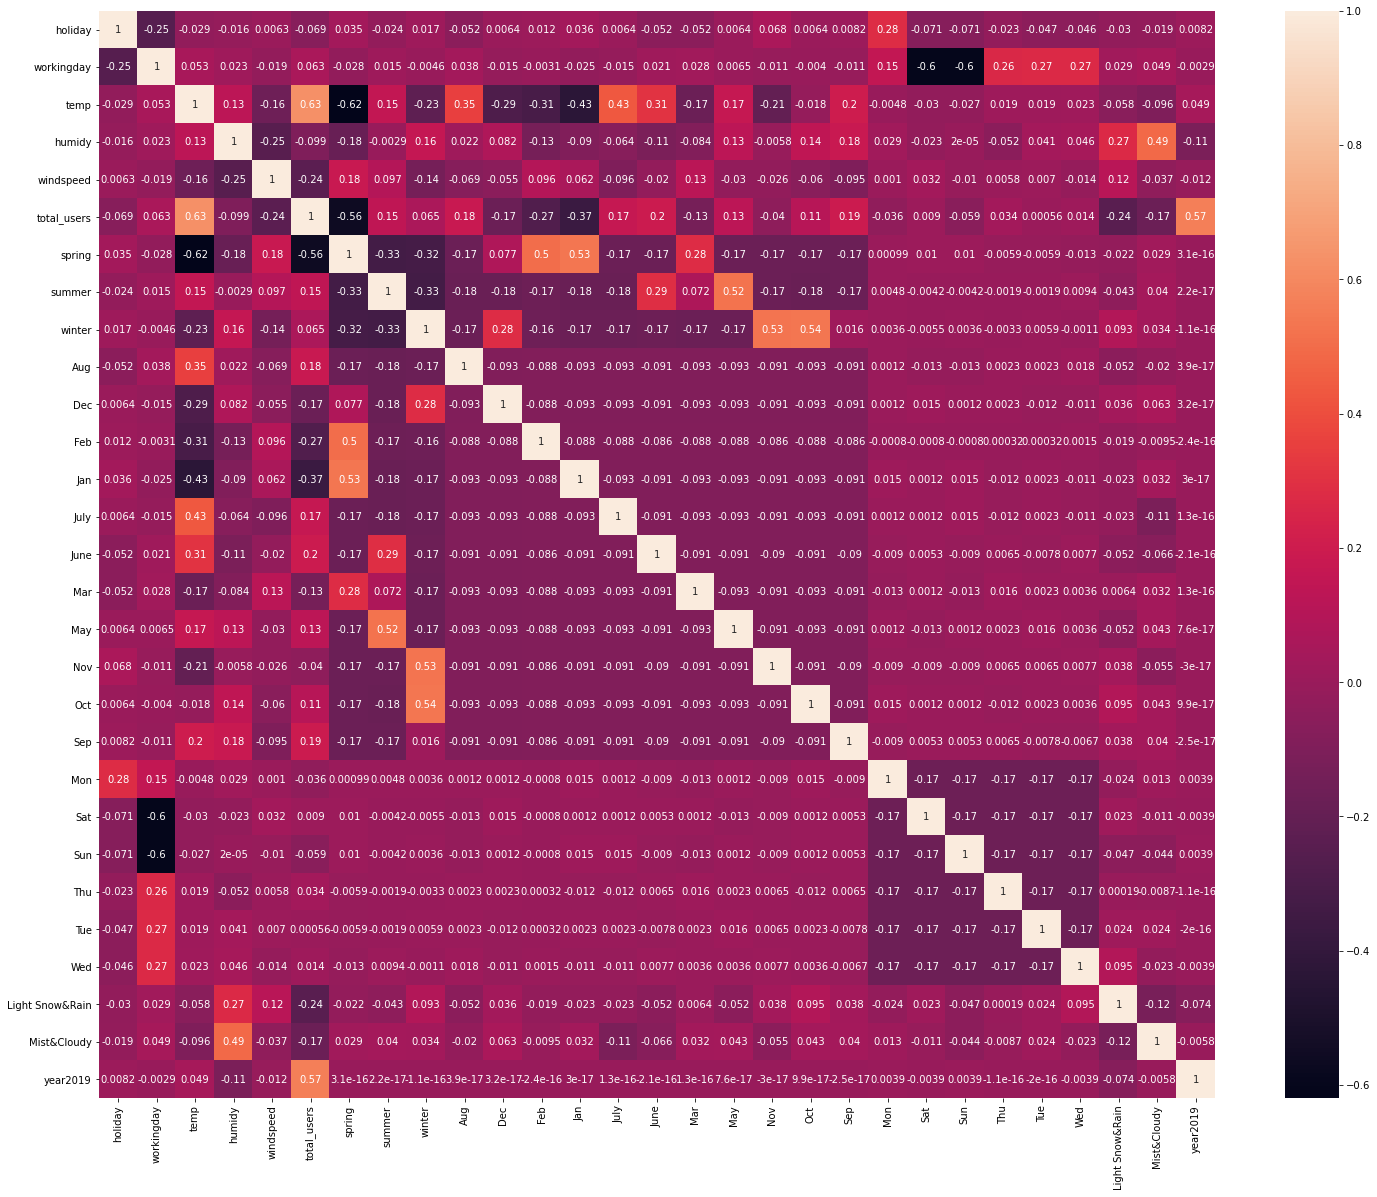

In [4414]:
# Correlation Heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(bikes.corr(), 
            annot = True)
plt.show()

- Saturday and sundays are correlated with working day, though negative.
- information maybe usefull in removing multicollinearity while making models

<!-- ### Holiday is highly co related with working day (negative) and Saturday and sunday(positive)
- so we remove holiday to avoid multicollinearity -->

<!-- -  The collection matrix shows a high correlation between some months and the seasons  -->

## 2. Train Test and split Data

In [4416]:
import sklearn
from sklearn.model_selection import train_test_split

In [4417]:
bikes.shape

(730, 29)

In [4418]:
bikes_train, bikes_test= train_test_split(bikes, train_size=0.7, random_state=100)

In [4419]:
bikes_train.shape

(510, 29)

In [4420]:
bikes_test.shape

(220, 29)

## 3. Rescaling Data

- we can use normalisation techique for rescaling data

In [4421]:
# We use Min max scaler

In [4422]:
# for this we import min max scaler

In [4423]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [4424]:
# now we need to from an array of continous data
num_vars=['temp', 'humidy', 'windspeed', 'total_users']

In [4425]:
# scaler=MinMaxScaler()# MinMaxScaler object intiated

# bikes_train[num_vars]= scaler.fit_transform(bikes_train[num_vars])

In [4426]:
scaler=StandardScaler()

bikes_train[num_vars]= scaler.fit_transform(bikes_train[num_vars])

In [4427]:
bikes_train[num_vars].describe()

temp        humidy     windspeed   total_users
count  5.100000e+02  5.100000e+02  5.100000e+02  5.100000e+02
mean  -2.920322e-16 -2.166023e-16  5.828671e-17  1.493359e-16
std    1.000982e+00  1.000982e+00  1.000982e+00  1.000982e+00
min   -2.381884e+00 -4.464419e+00 -1.891589e+00 -2.290356e+00
25%   -8.756866e-01 -7.675694e-01 -7.174407e-01 -7.006211e-01
50%    2.285273e-02  2.219277e-02 -1.421889e-01  2.291863e-02
75%    8.765214e-01  7.161828e-01  5.515521e-01  7.636488e-01
max    2.050027e+00  2.398847e+00  4.003357e+00  2.169933e+00

## 4. Model Building

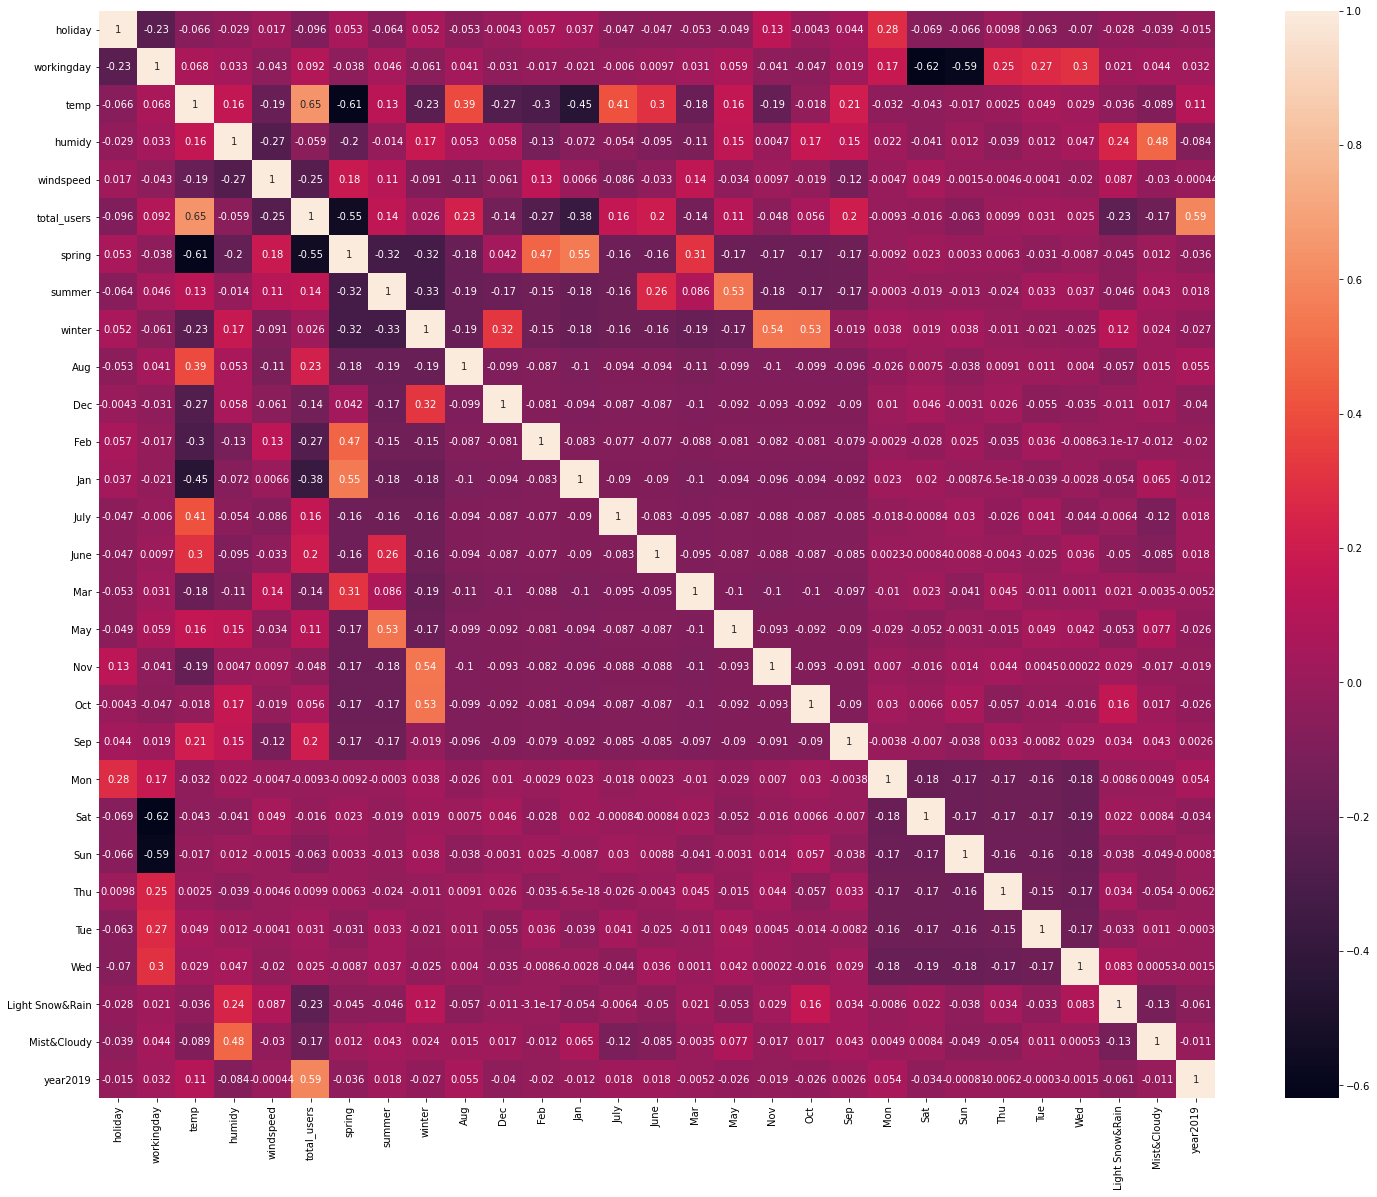

In [4428]:
# first lets see the correlation of training model
plt.figure(figsize=(25,20))
sns.heatmap(bikes_train.corr(), annot=True)
plt.show()

In [4429]:
# let y be the target variable,
# y_train we need to formulate
y_train = bikes_train.pop('total_users')
X_train= bikes_train

In [4430]:
# We use recursive feature elimination for feature elimination and for model building

### RFE

In [4431]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [4432]:
#linear regresssion object

In [4433]:
lm= LinearRegression()


In [4434]:
lm.fit(X_train,y_train)
rfe=RFE(lm,10)
rfe=rfe.fit(X_train,y_train)

In [4435]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidy', False, 11),
 ('windspeed', False, 9),
 ('spring', True, 1),
 ('summer', False, 8),
 ('winter', False, 3),
 ('Aug', False, 12),
 ('Dec', False, 5),
 ('Feb', False, 7),
 ('Jan', False, 6),
 ('July', True, 1),
 ('June', False, 18),
 ('Mar', False, 19),
 ('May', False, 10),
 ('Nov', False, 4),
 ('Oct', False, 17),
 ('Sep', False, 2),
 ('Mon', False, 13),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 15),
 ('Tue', False, 14),
 ('Wed', False, 16),
 ('Light Snow&Rain', True, 1),
 ('Mist&Cloudy', True, 1),
 ('year2019', True, 1)]

In [4436]:
# The columns where RFE is true
col= X_train.columns[rfe.support_]

In [4437]:
col

Index(['holiday', 'workingday', 'temp', 'spring', 'July', 'Sat', 'Sun',
       'Light Snow&Rain', 'Mist&Cloudy', 'year2019'],
      dtype='object')

In [4438]:
# we make this new dataframe , X_train_rfe with the columns from RFE
X_train_rfe = X_train[col]
X_train_rfe

holiday  workingday      temp  spring  July  Sat  Sun  Light Snow&Rain  \
576        0           1  1.230870       0     1    0    0                0   
426        0           0 -0.421238       1     0    1    0                0   
728        0           0 -1.295618       1     0    0    1                0   
482        0           0 -0.628327       0     0    1    0                0   
111        0           1 -0.849222       0     0    0    0                0   
..       ...         ...       ...     ...   ...  ...  ...              ...   
578        0           1  1.447165       0     0    0    0                0   
53         0           1 -1.483898       1     0    0    0                0   
350        0           0 -1.281812       0     0    1    0                0   
79         0           1 -0.331400       0     0    0    0                0   
520        0           1  0.278260       0     0    0    0                0   

     Mist&Cloudy  year2019  
576            0         1  
426            1         1  
728            0         1  
482            1         1  
111            1         0  
..           ...       ...  
578            0         1  
53             0         0  
350            1         0  
79             1         0  
520            1         1  

[510 rows x 10 columns]

### Building Model using stats Model

In [4439]:
# we need to import necessay for bulding model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Model 1

In [4440]:
# we need to add a contant 
X_train_rfe = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train, X_train_rfe)

lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_users   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     245.4
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.84e-177
Time:                        15:08:50   Log-Likelihood:                -292.81
No. Observations:                 510   AIC:                             605.6
Df Residuals:                     500   BIC:                             648.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2282      0.036     -6.302      0.000      -0.299      -0.157
holiday            -0.3278      0.098     -3.352      0.001      -0.520      -0.136
workingday          0.0852      0.035      2.463      0.014       0.017       0.153
temp                0.4220      0.027     15.766      0.000       0.369       0.475
spring             -0.6858      0.057    -12.012      0.000      -0.798      -0.574
July               -0.3589      0.080     -4.462      0.000      -0.517      -0.201
Sat                 0.1284      0.048      2.689      0.007       0.035       0.222
Sun                -0.1141      0.049     -2.337      0.020      -0.210      -0.018
Light Snow&Rain    -1.2988      0.116    -11.230      0.000      -1.526      -1.072
Mist&Cloudy        -0.3523      0.041     -8.537      0.000      -0.433      -0.271
year2019            1.0423      0.039     26.873      0.000       0.966       1.119
==============================================================================
Omnibus:                       61.257   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.681
Skew:                          -0.614   Prob(JB):                     2.58e-34
Kurtosis:                       5.402   Cond. No.                     1.24e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.72e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## VIF

- Now our aim is to calculate VIF and find if the calculations are true
- steps
- add from statsmodels.stats.outliers_influence import variance_inflation_factor
- remove constant from X_train_rfe
- make vif DataFrame
- add a column VIF to data frame as features as X_train.rfe.columns
- find variance_inflation_factors using variance_inflation_factor function
- analyse various features 

In [4441]:
X_train_rfe1= X_train_rfe

In [4442]:
X_train_rfe = X_train_rfe.drop('const', axis=1)
vif = pd.DataFrame()
X= X_train_rfe
vif['features']= X.columns
vif['VIF']= [variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending = False)
vif

features   VIF
1       workingday  2.67
2             temp  1.94
3           spring  1.63
5              Sat  1.36
6              Sun  1.31
4             July  1.24
0          holiday  1.05
8      Mist&Cloudy  1.04
7  Light Snow&Rain  1.03
9         year2019  1.02

## Model 2

In [4443]:
# Drop Sunday as P value seems higher
X_train_rfe= X_train_rfe.drop('Sun',axis=1)

In [4444]:
X_train_rfe = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train, X_train_rfe)

lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_users   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     245.4
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.84e-177
Time:                        15:08:50   Log-Likelihood:                -292.81
No. Observations:                 510   AIC:                             605.6
Df Residuals:                     500   BIC:                             648.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.3423      0.058     -5.895      0.000      -0.456      -0.228
holiday            -0.2136      0.131     -1.631      0.104      -0.471       0.044
workingday          0.1994      0.056      3.552      0.000       0.089       0.310
temp                0.4220      0.027     15.766      0.000       0.369       0.475
spring             -0.6858      0.057    -12.012      0.000      -0.798      -0.574
July               -0.3589      0.080     -4.462      0.000      -0.517      -0.201
Sat                 0.2426      0.071      3.436      0.001       0.104       0.381
Light Snow&Rain    -1.2988      0.116    -11.230      0.000      -1.526      -1.072
Mist&Cloudy        -0.3523      0.041     -8.537      0.000      -0.433      -0.271
year2019            1.0423      0.039     26.873      0.000       0.966       1.119
==============================================================================
Omnibus:                       61.257   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.681
Skew:                          -0.614   Prob(JB):                     2.58e-34
Kurtosis:                       5.402   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4445]:
X_train_rfe = X_train_rfe.drop('const', axis=1)
vif = pd.DataFrame()
X= X_train_rfe
vif['features']= X.columns
vif['VIF']= [variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending = False)
vif

features   VIF
1       workingday  2.28
3           spring  2.05
2             temp  1.93
8         year2019  1.83
7      Mist&Cloudy  1.50
4             July  1.31
5              Sat  1.28
6  Light Snow&Rain  1.06
0          holiday  1.04

In [4446]:
## Drop sunday as it is having a high P value

## Model 3

In [4447]:
X_train_rfe= X_train_rfe.drop('holiday',axis=1)

In [4448]:
## Build Model

In [4449]:
X_train_rfe = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train, X_train_rfe)

lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_users   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     274.8
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          8.42e-178
Time:                        15:08:50   Log-Likelihood:                -294.16
No. Observations:                 510   AIC:                             606.3
Df Residuals:                     501   BIC:                             644.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.3753      0.055     -6.883      0.000      -0.482      -0.268
workingday          0.2313      0.053      4.390      0.000       0.128       0.335
temp                0.4227      0.027     15.769      0.000       0.370       0.475
spring             -0.6877      0.057    -12.027      0.000      -0.800      -0.575
July               -0.3539      0.081     -4.396      0.000      -0.512      -0.196
Sat                 0.2747      0.068      4.046      0.000       0.141       0.408
Light Snow&Rain    -1.2958      0.116    -11.187      0.000      -1.523      -1.068
Mist&Cloudy        -0.3505      0.041     -8.482      0.000      -0.432      -0.269
year2019            1.0430      0.039     26.847      0.000       0.967       1.119
==============================================================================
Omnibus:                       62.720   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.955
Skew:                          -0.625   Prob(JB):                     1.85e-35
Kurtosis:                       5.442   Cond. No.                         8.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4450]:
X_train_rfe = X_train_rfe.drop('const', axis=1)
vif = pd.DataFrame()
X= X_train_rfe
vif['features']= X.columns
vif['VIF']= [variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending = False)
vif

features   VIF
0       workingday  2.24
2           spring  2.02
1             temp  1.93
7         year2019  1.80
6      Mist&Cloudy  1.50
3             July  1.31
4              Sat  1.27
5  Light Snow&Rain  1.06

## Predictions

In [4451]:

X_train_rfe = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train, X_train_rfe)

lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_users   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     274.8
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          8.42e-178
Time:                        15:08:50   Log-Likelihood:                -294.16
No. Observations:                 510   AIC:                             606.3
Df Residuals:                     501   BIC:                             644.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.3753      0.055     -6.883      0.000      -0.482      -0.268
workingday          0.2313      0.053      4.390      0.000       0.128       0.335
temp                0.4227      0.027     15.769      0.000       0.370       0.475
spring             -0.6877      0.057    -12.027      0.000      -0.800      -0.575
July               -0.3539      0.081     -4.396      0.000      -0.512      -0.196
Sat                 0.2747      0.068      4.046      0.000       0.141       0.408
Light Snow&Rain    -1.2958      0.116    -11.187      0.000      -1.523      -1.068
Mist&Cloudy        -0.3505      0.041     -8.482      0.000      -0.432      -0.269
year2019            1.0430      0.039     26.847      0.000       0.967       1.119
==============================================================================
Omnibus:                       62.720   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.955
Skew:                          -0.625   Prob(JB):                     1.85e-35
Kurtosis:                       5.442   Cond. No.                         8.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Residual analysis

In [4452]:
X_train_rfe

const  workingday      temp  spring  July  Sat  Light Snow&Rain  \
576    1.0           1  1.230870       0     1    0                0   
426    1.0           0 -0.421238       1     0    1                0   
728    1.0           0 -1.295618       1     0    0                0   
482    1.0           0 -0.628327       0     0    1                0   
111    1.0           1 -0.849222       0     0    0                0   
..     ...         ...       ...     ...   ...  ...              ...   
578    1.0           1  1.447165       0     0    0                0   
53     1.0           1 -1.483898       1     0    0                0   
350    1.0           0 -1.281812       0     0    1                0   
79     1.0           1 -0.331400       0     0    0                0   
520    1.0           1  0.278260       0     0    0                0   

     Mist&Cloudy  year2019  
576            0         1  
426            1         1  
728            0         1  
482            1         1  
111            1         0  
..           ...       ...  
578            0         1  
53             0         0  
350            1         0  
79             1         0  
520            1         1  

[510 rows x 9 columns]

In [4453]:
y_train_pred=lr_model.predict(X_train_rfe)

In [4454]:
y_train_pred

576    1.065355
426   -0.273992
728   -0.567786
482    0.326193
111   -0.853530
         ...   
578    1.510680
53    -1.459019
350   -0.993007
79    -0.634637
520    0.666038
Length: 510, dtype: float64

## Plot Residuals

Text(0.5, 0, 'Error')

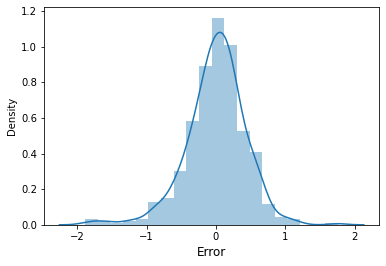

In [4455]:
sns.distplot((y_train - y_train_pred),bins=20)               
plt.xlabel('Error', fontsize = 12)

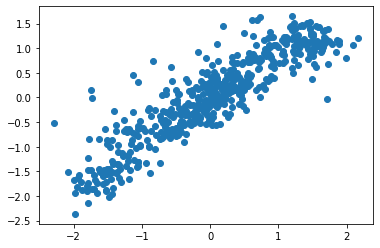

In [4489]:
# Linear relationship plot
fig = plt.figure()
plt.scatter(y_train,y_train_pred)

In [4481]:
res= y_train - y_train_pred

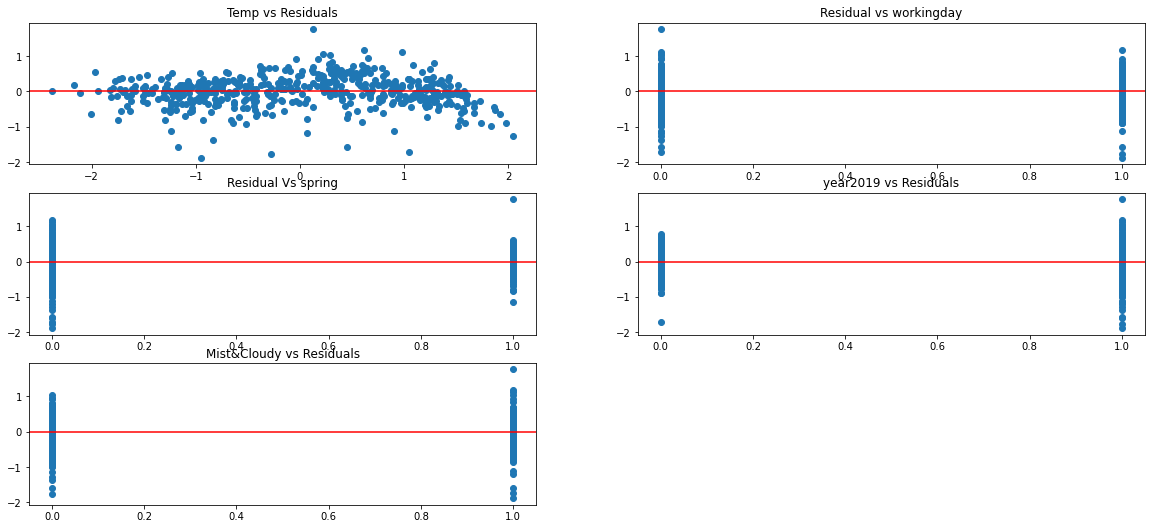

In [4488]:
# Scatter Plot for all the residuals. We can find that the means are being centered at 0
plt.figure(figsize=(20, 12))
plt.subplot(4,2,1)
plt.scatter(X_train['temp'],res)
plt.title("Temp vs Residuals")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,6)

plt.subplot(4,2,2)
plt.scatter(X_train_rfe['workingday'],res)
plt.title("Residual vs workingday")
plt.axhline(y=0, color='r', linestyle='-')


plt.subplot(4,2,3)
plt.scatter(X_train_rfe['spring'],res)
plt.title("Residual Vs spring")
plt.axhline(y=0, color='r', linestyle='-')

plt.subplot(4,2,4)
plt.scatter(X_train_rfe['year2019'],res)
plt.title("year2019 vs Residuals")
plt.axhline(y=0, color='r', linestyle='-')


plt.subplot(4,2,5)
plt.scatter(X_train['Mist&Cloudy'],res)
plt.title("Mist&Cloudy vs Residuals")
plt.axhline(y=0, color='r', linestyle='-')


plt.show()

## Predictions 

In [4456]:
# Before making predictions we need to transform data

In [4457]:
scaler=StandardScaler()

bikes_test[num_vars]= scaler.fit_transform(bikes_test[num_vars])

In [4458]:
bikes_test[num_vars]

temp    humidy  windspeed  total_users
184  1.173684  0.129035  -1.438721     0.779972
535  1.472711 -0.189330  -1.002162     0.868363
299 -0.200958  1.344590   0.131346    -1.000487
221  1.387913 -1.355680   0.165034     0.115457
152  1.111198 -2.183417   1.407612     0.214371
..        ...       ...        ...          ...
702 -0.169718  0.794694  -0.187761     1.076189
127  0.111459  0.085622  -1.531097    -0.119728
640  0.803243  1.211456  -1.640352     1.584440
72  -0.976378 -0.850078  -0.690076    -1.323011
653 -0.209886 -0.423758  -0.078502     1.564447

[220 rows x 4 columns]

In [4459]:
y_test =bikes_test.pop('total_users')
X_test =bikes_test

In [4460]:
y_test

184    0.779972
535    0.868363
299   -1.000487
221    0.115457
152    0.214371
         ...   
702    1.076189
127   -0.119728
640    1.584440
72    -1.323011
653    1.564447
Name: total_users, Length: 220, dtype: float64

In [4461]:
X_test

holiday  workingday      temp    humidy  windspeed  spring  summer  \
184        1           0  1.173684  0.129035  -1.438721       0       0   
535        0           1  1.472711 -0.189330  -1.002162       0       1   
299        0           1 -0.200958  1.344590   0.131346       0       0   
221        0           1  1.387913 -1.355680   0.165034       0       0   
152        0           1  1.111198 -2.183417   1.407612       0       1   
..       ...         ...       ...       ...        ...     ...     ...   
702        0           1 -0.169718  0.794694  -0.187761       0       0   
127        0           0  0.111459  0.085622  -1.531097       0       1   
640        0           1  0.803243  1.211456  -1.640352       0       0   
72         0           1 -0.976378 -0.850078  -0.690076       1       0   
653        0           1 -0.209886 -0.423758  -0.078502       0       0   

     winter  Aug  Dec  ...  Sep  Mon  Sat  Sun  Thu  Tue  Wed  \
184       0    0    0  ...    0    1    0    0    0    0    0   
535       0    0    0  ...    0    0    0    0    0    0    1   
299       1    0    0  ...    0    0    0    0    1    0    0   
221       0    1    0  ...    0    0    0    0    0    0    1   
152       0    0    0  ...    0    0    0    0    1    0    0   
..      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
702       1    0    1  ...    0    0    0    0    0    1    0   
127       0    0    0  ...    0    0    0    1    0    0    0   
640       1    0    0  ...    0    0    0    0    0    0    1   
72        0    0    0  ...    0    1    0    0    0    0    0   
653       1    0    0  ...    0    0    0    0    0    1    0   

     Light Snow&Rain  Mist&Cloudy  year2019  
184                0            1         0  
535                0            0         1  
299                0            1         0  
221                0            0         0  
152                0            0         0  
..               ...          ...       ...  
702                0            0         1  
127                0            0         0  
640                0            1         1  
72                 0            0         0  
653                0            0         1  

[220 rows x 28 columns]

In [4462]:
X_train_rfe.columns

Index(['const', 'workingday', 'temp', 'spring', 'July', 'Sat',
       'Light Snow&Rain', 'Mist&Cloudy', 'year2019'],
      dtype='object')

In [4463]:
# new data frame with final variables that effect the Y_test , or total users

X_train_new = X_train_rfe.drop('const',axis=1)
X_test_1 = X_test[X_train_new.columns]

In [4464]:
X_test_1

workingday      temp  spring  July  Sat  Light Snow&Rain  Mist&Cloudy  \
184           0  1.173684       0     1    0                0            1   
535           1  1.472711       0     0    0                0            0   
299           1 -0.200958       0     0    0                0            1   
221           1  1.387913       0     0    0                0            0   
152           1  1.111198       0     0    0                0            0   
..          ...       ...     ...   ...  ...              ...          ...   
702           1 -0.169718       0     0    0                0            0   
127           0  0.111459       0     0    0                0            0   
640           1  0.803243       0     0    0                0            1   
72            1 -0.976378       1     0    0                0            0   
653           1 -0.209886       0     0    0                0            0   

     year2019  
184         0  
535         1  
299         0  
221         0  
152         0  
..        ...  
702         1  
127         0  
640         1  
72          0  
653         1  

[220 rows x 8 columns]

In [4465]:
X_test_new= sm.add_constant(X_test_1)
X_test_new

const  workingday      temp  spring  July  Sat  Light Snow&Rain  \
184    1.0           0  1.173684       0     1    0                0   
535    1.0           1  1.472711       0     0    0                0   
299    1.0           1 -0.200958       0     0    0                0   
221    1.0           1  1.387913       0     0    0                0   
152    1.0           1  1.111198       0     0    0                0   
..     ...         ...       ...     ...   ...  ...              ...   
702    1.0           1 -0.169718       0     0    0                0   
127    1.0           0  0.111459       0     0    0                0   
640    1.0           1  0.803243       0     0    0                0   
72     1.0           1 -0.976378       1     0    0                0   
653    1.0           1 -0.209886       0     0    0                0   

     Mist&Cloudy  year2019  
184            1         0  
535            0         1  
299            1         0  
221            0         0  
152            0         0  
..           ...       ...  
702            0         1  
127            0         0  
640            1         1  
72             0         0  
653            0         1  

[220 rows x 9 columns]

In [4466]:
y_test_pred= lr_model.predict(X_test_new)

In [4467]:
y_test_pred

184   -0.583624
535    1.521479
299   -0.579497
221    0.442672
152    0.325700
         ...   
702    0.827195
127   -0.328225
640    0.887957
72    -1.244481
653    0.810216
Length: 220, dtype: float64

# Model evaluation 

In [4490]:
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred)

0.8021669337571071

### Plot Residuals

Text(0, 0.5, 'Residuals')

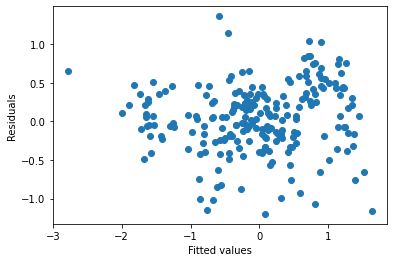

In [4480]:
plt.scatter(y_test_pred, (y_test-y_test_pred))
plt.ylabel("Residuals")

### Linearity Test Plot

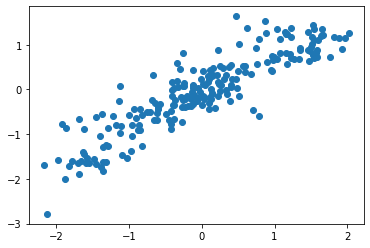

In [4470]:
# Linear relationship plot
fig = plt.figure()
plt.scatter(y_test,y_test_pred)

In [4472]:
y_test.shape

(220,)

In [4473]:
y_test_pred.shape

(220,)

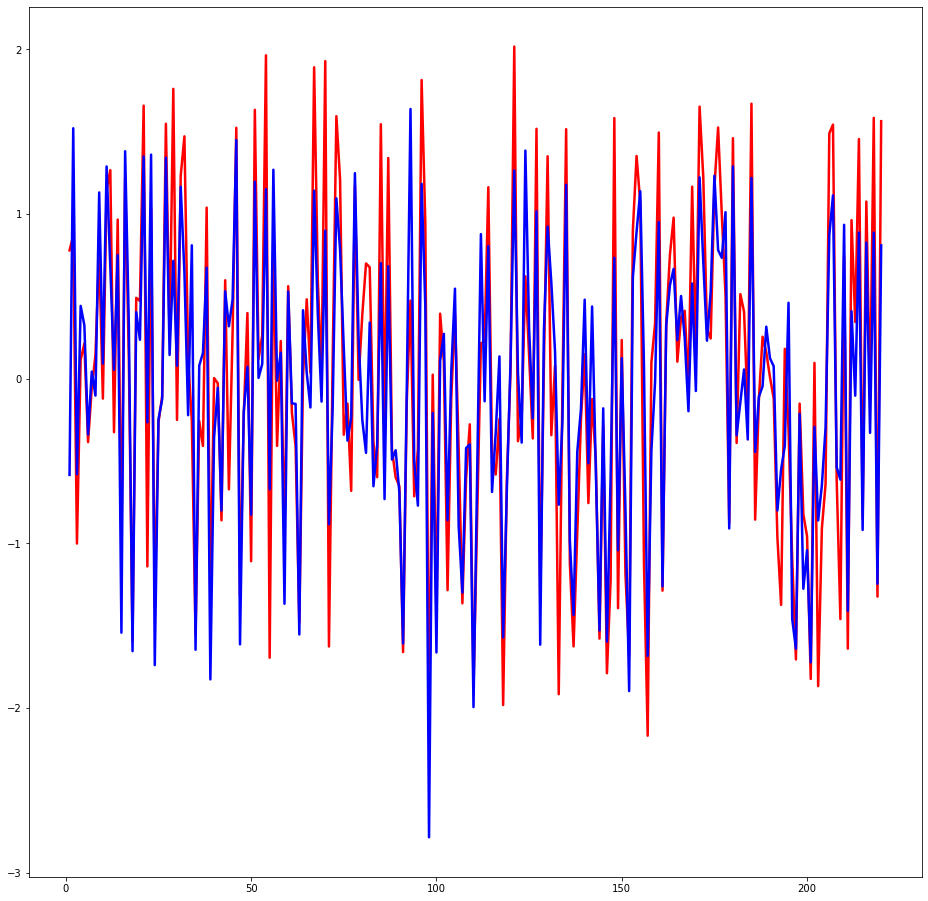

In [4474]:
# Actual output vs predicted output
x=[x for x in range(1,221,1)]
plt.figure(figsize=(16,16))
plt.plot(x,y_test, color="red",linewidth=2.5, linestyle="-" )
plt.plot(x,y_test_pred, color="blue",linewidth=2.5, linestyle="-" )

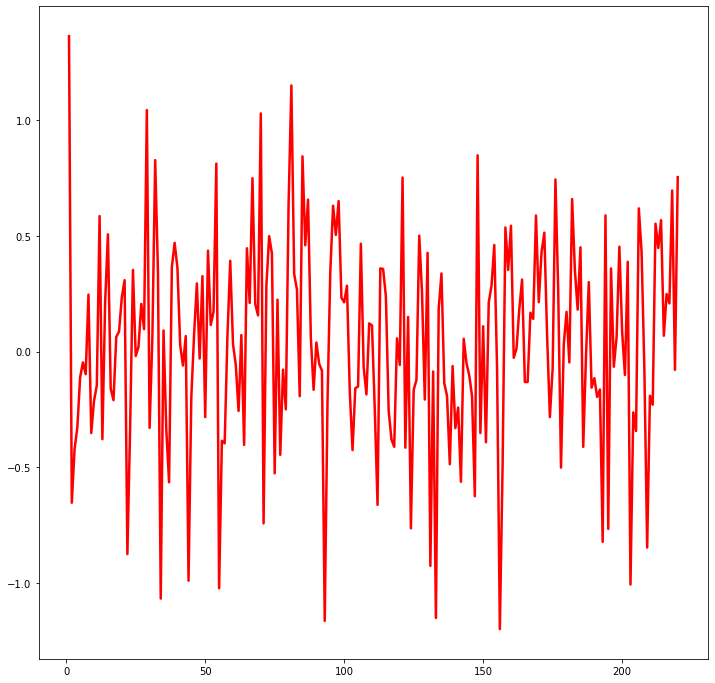

In [4475]:
# Plot of error terms
x=[x for x in range(1,221,1)]
plt.figure(figsize=(12,12))
plt.plot(x,y_test-y_test_pred, color="red",linewidth=2.5, linestyle="-" )

In [4476]:
X_train_rfe = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train, X_train_rfe)

lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_users   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     274.8
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          8.42e-178
Time:                        15:08:51   Log-Likelihood:                -294.16
No. Observations:                 510   AIC:                             606.3
Df Residuals:                     501   BIC:                             644.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.3753      0.055     -6.883      0.000      -0.482      -0.268
workingday          0.2313      0.053      4.390      0.000       0.128       0.335
temp                0.4227      0.027     15.769      0.000       0.370       0.475
spring             -0.6877      0.057    -12.027      0.000      -0.800      -0.575
July               -0.3539      0.081     -4.396      0.000      -0.512      -0.196
Sat                 0.2747      0.068      4.046      0.000       0.141       0.408
Light Snow&Rain    -1.2958      0.116    -11.187      0.000      -1.523      -1.068
Mist&Cloudy        -0.3505      0.041     -8.482      0.000      -0.432      -0.269
year2019            1.0430      0.039     26.847      0.000       0.967       1.119
==============================================================================
Omnibus:                       62.720   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.955
Skew:                          -0.625   Prob(JB):                     1.85e-35
Kurtosis:                       5.442   Cond. No.                         8.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4477]:
X_train_rfe = X_train_rfe.drop('const', axis=1)
vif = pd.DataFrame()
X= X_train_rfe
vif['features']= X.columns
vif['VIF']= [variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending = False)
vif

features   VIF
0       workingday  2.24
2           spring  2.02
1             temp  1.93
7         year2019  1.80
6      Mist&Cloudy  1.50
3             July  1.31
4              Sat  1.27
5  Light Snow&Rain  1.06

### Our equation of Multi-Linear regression line is:
# Y= -0.3753 +(0.2313* workingday) +(0.4227 *temp)-(0.6877* spring) -(0.3539*July)- (0.2747*Sat)-(1.2958 * Light Snow&Rain)-(0.3505*Mist&Cloudy)+(1.0415 * year2019)


- Workingday: Its coefficient is 0.2313
with p-value of 0 and VIF 2.24

- Temprature: Its coefficient is 0.5527 
with p-value of 0 and VIF 1.93. 

- Spring : Its coefficient is -0.6877
with p-value of 0 and VIF 2.02

- Month of July: Its coefficient -0.3539
with p-value of 0 and VIF 1.31

- Saturday : Its coefficient 0.2747
with p-value of 0 and VIF 1.31

- Weather Situation, Light Snow and Rain: Its coefficient -1.2958
with p-value of 0 and VIF 1.06

- Weather Situation, Misty and Cloudy : Its coefficient -0.3505
with p-value of 0 and VIF 1.50

- Year 2019, : Its coefficient 1.0430
with p-value of 0 and VIF 1.80

# Model Evaluation:

In [4491]:
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred)

0.8021669337571071